# Letter Counter - Contador de letras


Un pequeño notebook para contar la frecuencia de las letras en el castellano (o en cualquier idioma, siempre que le pases la lista de letras en un CSV).

Esto que estas leyendo, es un Jupyter notebook. Puedes utilizarlo como documeto, o como herramienta ejecutable (y que permite modificaciones de forma interactiva). Para saber mas sobre como ejecutarlo, mira la documentacion en [jupyter.org](https://jupyter.org/) y revisa el Makefile.


### Loading Internal Assets

You can ignore this part.


In [143]:
import unidecode
from collections import defaultdict

# Loading libraries
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


# Load jupyter notify
# See https://github.com/shoprunner/jupyter-notify
%load_ext jupyternotify



The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [11]:
%%notify -o

pass

<IPython.core.display.Javascript object>

### Configuration - Configuracion

If you want to change settings, like data sources.

---

Si necesitas cambiar configuracion, como los acentos o la fuente de datos.

In [4]:

# Distinguish accent (True = i and í are 2 different letters; False = they are 2 letter i's)
accent_dif = False # False to ignore, as we won't be using them either for the exercises.

# Data sources
wordlist_fileSHORT = r'../data/Anexo I - palabras 3-9 letras.xls'
wordlist_fileLONG = r'../data/Anexo II - palabras 10-16 letras.xls'


### Statistics - Estidisticas

Restart the counters

---

Reinicia los contadores

In [5]:
## Clear Up the statistics

## GLOBAL Variables
# total of words counted
word_sum = 0
# Freq of each letter
letter_frequency = defaultdict(lambda:0)
# Percentile of each letter's frequency
letter_freq_percent = defaultdict(lambda:0)
 

## Obtain list of usable words from 5 to 6 letters

Using pandas and matplotlib.

--- 

Utilizando pandas y matplotlib.



In [ ]:
# SKIP Obtain the list of words from the original database
## SLOW Run carefully.

#load the sheets for 5 and 6 letters words as Pandas DataFrames
words5letters = pd.read_excel (wordlist_fileSHORT, sheet_name="5")
words6letters = pd.read_excel (wordlist_fileSHORT, sheet_name="6")

# Extract only the words and the lexyc frequency of words
w5l = pd.DataFrame(words5letters ,columns=["PALABRA","FRECUENC"])
w6l = pd.DataFrame(words6letters , columns=["PALABRA", "FRECUENC"])
w6l

In [6]:
#TMP Debbuging the 15 sheet

words15letters = pd.read_excel (wordlist_fileLONG, sheet_name="15")
words15letters


,PALABRA,FRECUEN,NTV,NTV1,NTV2,NTV3,NTV4,NTV5,NTV6,NTV7,...,FA6,FA7,FA8,FA9,FA10,FA11,FA12,FA13,FA14,FA15
0,abaldonadamente,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abarrancamiento,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abdicativamente,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,aburguesamiento,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acaudillamiento,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,vitivinicultora,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1006,vitivinicultura,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1007,vituperosamente,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1008,voluntariamente,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Counting the letters into the frequency database 

To build the statistics about how frequent each letter is.

In [65]:
## Obtain the full database
## SLOW Run carefully.

#load the sheets for 5 and 6 letters words as Pandas DataFrames
all_words = pd.DataFrame(columns=["PALABRA","FRECUENC"])


for i in range(3,10): # range from 3 to 9, inclusive
    # wordlist_fileSHORT
    sheety = pd.read_excel (wordlist_fileSHORT, sheet_name=f"{i}")
    all_words = all_words.append( pd.DataFrame(sheety ,columns=["PALABRA","FRECUENC"]), ignore_index=True )
for i in range(10,17): # range from 10 to 16, inclusive
    # wordlist_fileLONG
    sheety = pd.read_excel (wordlist_fileLONG, sheet_name=f"{i}")
    all_words = all_words.append(pd.DataFrame(sheety ,columns=["PALABRA","FRECUENC"]), ignore_index=True )



all_words


,PALABRA,FRECUENC
0,aba,0
1,aca,0
2,acá,46
3,adó,0
4,afé,0
...,...,...
95378,ultramicroscopio,0
95379,ventriculografía,0
95380,vertiginosamente,2
95381,vicealmirantazgo,0


In [12]:
## Count the word into the stats D
## WARNING: Modifies state (word count)

def is_vowel(letter):
    """ returt if it's a vowel """
    return unidecode.unidecode(letter) in "aeiou"

def no_accent(letter):
    """ turn a letter into the no accent equivalent"""
    return unidecode.unidecode(letter) 

assert is_vowel("a") == True
assert is_vowel("á") == True
assert is_vowel("v") == False


assert no_accent("a") == "a"
assert no_accent("á") == "a"
assert no_accent("v") == "v"
    
def count_word(word, letter_frequency = letter_frequency, accent_dif = accent_dif):
    """
    Given a word, update the global stats dictionary.
    It considers if you want to distinguish accents or not.
    """
    global word_sum
    # don't count not numbers
    if type(word) == type(0.1):
        return None
    # Count the word to the total of words
    word_sum += 1
    # We might need to exclude accents, but not the ñ
    for letter in word:
        if not accent_dif: # we must NOT distinguish accents
            if is_vowel(letter):
                letter_frequency[no_accent(letter)] += 1
            else:
                letter_frequency[letter] += 1
        else:
            letter_frequency[letter] += 1


In [20]:
### DEBUG Error checking which words are missing on the new data set.
#### Loading a manually concatenated csv file.

filename = "../data/ListaTodasPalabras.csv"
# Initialise some variables
d = defaultdict(lambda:0)
total = 0
palabras = []

with open(filename) as fh:
    # count the total words and the letters
    for word in fh.readlines():
        if word == "PALABRAS\n":
            continue # Ignore the header name
        total += 1
        palabras.append(word.strip())
        noacc = unidecode.unidecode(word)
        for letter in noacc.strip():
            d[letter] += 1


print("Letter frequency from least to most")
s = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}


for item,val in s.items():
    print(f"{item} : {val}")


def is_not_in(word, palabras=palabras):
    if word in palabras:
        return None
    else:
        return word
    
    
assert is_not_in("aba") == None
assert is_not_in("somethingrandom") == "somethingrandom"

################ Contando palabras de un CSV pegado a mano

print("Total words counted from CSV")
print(total)

# TODO: There are some issues with importing the excel into pandas. some are fake nan.
len(all_words) - len(palabras) # Equals 0. There are the same number of records, but some are "nan"


Letter frequency from least to most
w : 24
k : 89
y : 1252
x : 1402
q : 3280
j : 5190
z : 6454
v : 8209
h : 8224
f : 9330
g : 14703
b : 15241
p : 19532
m : 25658
u : 26367
d : 34490
s : 34923
l : 39449
t : 43949
c : 46648
n : 52935
i : 70377
r : 77056
o : 78651
e : 79179
a : 130353
Total words counted from CSV
95383


0

In [ ]:
# DEBUG : Running it in one word (WARNING: State change)

p = all_words[3].PALABRA[15]
f = all_words[3].FRECUENC[15]

print(p)
print(f)

print("Stadisticas antes", word_sum )
print("Stadisticas antes", letter_frequency )
count_word(p)
print("Stadisticas despues", word_sum )
print("Stadisticas despues", letter_frequency )

In [26]:
# Running it on all the words
## Building the Freq Table. Run Once.

def build_letter_freq_table():
    """
    Build the table with the total stats of letter frequency
    """
    for idx, word in enumerate(all_words.PALABRA):
        # make each letter into the stats dir.
        try:
            count_word(word)
        except TypeError as e:
            print(e)
            print(word)
            print(type(word))
            print("WTF")
    return None

build_letter_freq_table()
letter_frequency




defaultdict(<function __main__.<lambda>()>,
            {'a': 130353,
             'b': 15241,
             'c': 46648,
             'd': 34490,
             'o': 78651,
             'f': 9330,
             'e': 79179,
             'g': 14703,
             'h': 8224,
             'i': 70377,
             'j': 5190,
             'l': 39449,
             'm': 25658,
             'n': 50682,
             'ñ': 2253,
             'p': 19532,
             'r': 77056,
             's': 34923,
             't': 43949,
             'u': 26367,
             'v': 8209,
             'x': 1402,
             'y': 1252,
             'z': 6454,
             'k': 89,
             'q': 3280,
             'w': 24})

In [66]:
%notify -m "freq table built"

<IPython.core.display.Javascript object>

In [ ]:
# Running it on all the words to check for missing words

palabras_not_in = []

def find_missing_words():
    """
    Build the table with the total stats of letter frequency
    """
    for idx, word in enumerate(all_words.PALABRA):
        # make each letter into the stats dir.
        try:
            if is_not_in(word):
                palabras_not_in.append(word)
        except TypeError as e:
            print(e)
            print(word)
            print(type(word))
            print("WTF")
    return None

find_missing_words()
letter_frequency




In [ ]:
# todelete: Another way to run stuff on all the words.
# Trying to get missing words.

for idx, word in all_words.PALABRA.iteritems():
    if word == "abejorreo":
        print("YAY")
    try:
        pass
        #print("after",all_words.PALABRA.get(idx-1))
    except TypeError as e:
        print(e)

#"anatomopatólogo"

In [67]:
print(all_words.PALABRA[37])
print(len(all_words.PALABRA))

avo
95383


In [ ]:
# TMP Notes. How to merge 2 dataframes
df1 = palabras # tendria que ser un data frame.
df2 = all_words # all the words
merged = df1.merge(df2, indicator=True, how='outer')
merged[merged['_merge'] == 'right_only']

In [68]:
%%notify 
# RUN: Check stats
print("letter_frequency",letter_frequency)
print("word_sum",word_sum)
print("missing words", len(palabras_not_in))


letter_frequency defaultdict(<function <lambda> at 0x7f48ac6c6ea0>, {'a': 130353, 'b': 15241, 'c': 46648, 'd': 34490, 'o': 78651, 'f': 9330, 'e': 79179, 'g': 14703, 'h': 8224, 'i': 70377, 'j': 5190, 'l': 39449, 'm': 25658, 'n': 50682, 'ñ': 2253, 'p': 19532, 'r': 77056, 's': 34923, 't': 43949, 'u': 26367, 'v': 8209, 'x': 1402, 'y': 1252, 'z': 6454, 'k': 89, 'q': 3280, 'w': 24})
word_sum 95383
missing words 0


<IPython.core.display.Javascript object>

In [69]:
%notify 

<IPython.core.display.Javascript object>

### Calculate the Percentage of frequency for each letter

With the table of frequencies, we calculate the percentage of frequency of each letter.


In [34]:
## 
# tenemos la tabla de frec. Necesitamos phi. Hay que calcular, el phi de una palabla.
# para el phi, necesitamos, el % de frequencias

#suma todas las frec de todas las letras
tot_letters = 0 # all the counted letters
for k,v in letter_frequency.items():
    tot_letters += v
    
print("The sum of all the letters counted is:",tot_letters)

# Calculate the percentage of each letter's frequency

# letter_freq_percent = defaultdict(lambda:0) #reset it for testing
for letter,freq in letter_frequency.items():
    letter_freq_percent[letter] = (letter_frequency[letter] * 100 ) / tot_letters
    
print("The frequency percentage of each letter is: ",letter_freq_percent)

# Validate that the percentile is correct
check = 0
for l,f in letter_freq_percent.items():
    check+=f
print(round(check), " should be ", 100)
    

The sum of all the letters counted is: 832965
The frequency percentage of each letter is:  defaultdict(<function <lambda> at 0x7f4886e0e048>, {'a': 15.649276980425348, 'b': 1.8297287401031255, 'c': 5.60023530400437, 'd': 4.140630158530071, 'o': 9.442293493724225, 'f': 1.1200950820262556, 'e': 9.505681511227962, 'g': 1.7651401919648484, 'h': 0.9873163938460799, 'i': 8.448974446705444, 'j': 0.6230753993265024, 'l': 4.735973300198688, 'm': 3.08032150210393, 'n': 6.084529361977994, 'ñ': 0.2704795519619672, 'p': 2.34487643538444, 'r': 9.250808857515022, 's': 4.192613135005672, 't': 5.276212085741898, 'u': 3.165439124092849, 'v': 0.9855155978942692, 'x': 0.16831439496257344, 'y': 0.15030643544446645, 'z': 0.7748224715324173, 'k': 0.010684722647410156, 'q': 0.39377404812927314, 'w': 0.0028812735228971207})
100  should be  100


### Calculate  Phi

take the frequency of each letter in a word, and add it up, to calculate the total "Phi" score.


In [40]:

def calculate_phi(word):
    """ Calculate Phi
    Sum the frequency of each letter of the word"""
    phi = 0
    for letter in word:
        phi += letter_freq_percent[letter]
    return phi

assert round(calculate_phi("aa"),4) == round(31.2986,4)
assert calculate_phi("") == 0 
print( round(calculate_phi("busto"),4), round(23.9063,4 ))
print( round(calculate_phi("casa"),4), round(41.0914,4 ))


23.9063 23.9063
41.0914 41.0914


### Calculate Rho

Sum the total of strokes required for a word, adding up the strokes of each letter in it.

In [124]:
# Stats of strokes per letter.
rasgos = {
        "a": 3,        "b": 4,        "c": 2,        "d": 3,        "e": 3,        "f": 4,
        "g": 4,        "h": 4,        "i": 3,        "j": 3,        "k": 5,        "l": 2,
        "m": 6,        "n": 4,        "o": 3,        "p": 4,        "q": 3,        "r": 3,
        "s": 3,        "t": 4,        "u": 4,        "v": 4,        "w": 6,        "x": 4,
        "y": 5,        "z": 5,        "ñ": 5
}

In [130]:
## Trying to calculate Stroke sum RHO
## Sum of all the strokes of each letter in a word

def get_rho(letter):
    if len(letter) > 1:
        print("ERROR: ", letter)
        raise Exception("Word instead of letter")
    return rasgos[letter]

def calculate_rho(word=None):
    """ Calculate the Rho value of a word.
    Rho is the sum of the strokes of the each letter in a word.
    """
    if word is None:
        return 0
    rho = 0
    for letter in word:
        if not accent_dif: # we must NOT distinguish accents
            if is_vowel(letter):
                rho += get_rho(no_accent(letter))
            else:
                rho += get_rho(letter)
        else:
            rho += get_rho(letter)
    return rho

assert calculate_rho("aa") == 6
assert calculate_rho("")==0
assert calculate_rho("peluca")== 18
assert calculate_rho("pelúca")== 18
assert calculate_rho()==0

## Adding the data together

Now that we can calculate Phi (total frecuency of letters) and Rho (total strokes to write the word),
we can compute a big table to hold all the data together, and make creating experiments easier.



In [301]:
## Create DATA
## Creating a new column with the Rho of each word
print(type(all_words))

def compute_rho(df):
    return [calculate_rho(x) for x in df.PALABRA]

data = all_words.assign(RHO=lambda x: compute_rho(x))

## Creating a new column with the Phi of each word
print(type(all_words))

def compute_phi(df):
    return [calculate_phi(x) for x in df.PALABRA]

data = data.assign(PHI=lambda x: compute_phi(x))

## Creating a new column with the length
print(type(all_words))

def compute_len(df):
    return [len(x) for x in df.PALABRA]

data = data.assign(LENGTH=lambda x: compute_len(x))

data

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,PALABRA,FRECUENC,RHO,PHI,LENGTH
0,aba,0,10,33.128283,3
1,aca,0,8,36.898789,3
2,acá,46,8,21.249512,3
3,adó,0,9,19.789907,3
4,afé,0,10,16.769372,3
...,...,...,...,...,...
95378,ultramicroscopio,0,51,113.371630,16
95379,ventriculografía,0,52,105.930261,16
95380,vertiginosamente,2,57,112.502446,16
95381,vicealmirantazgo,0,55,120.347314,16


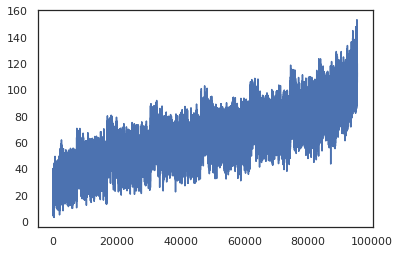

In [282]:
data.PHI.plot()


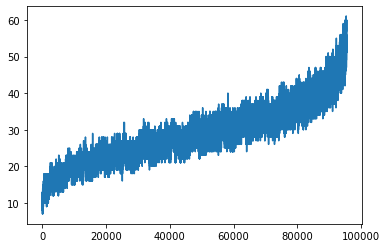

In [146]:
data.RHO.plot()

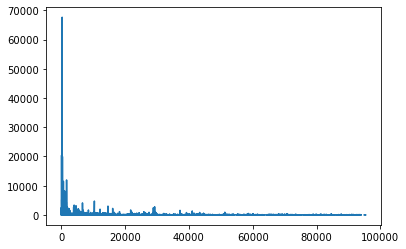

In [147]:
data.FRECUENC.plot()

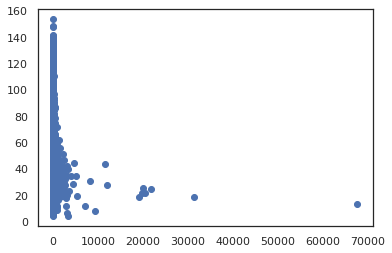

In [305]:
plt.scatter(data.FRECUENC,data.PHI) # (x=Freq,y=phi)

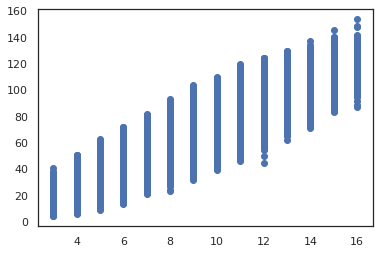

In [157]:
# (x=length,y=phi)
plt.scatter(data.LENGTH,data.PHI) 

(array([4.4100e+02, 4.7420e+03, 1.4795e+04, 2.5299e+04, 2.5647e+04,
        1.5843e+04, 6.5680e+03, 1.8040e+03, 2.3100e+02, 1.3000e+01]),
 array([  3.46605199,  18.46958756,  33.47312312,  48.47665868,
         63.48019425,  78.48372981,  93.48726537, 108.49080093,
        123.4943365 , 138.49787206, 153.50140762]),
 <a list of 10 Patch objects>)

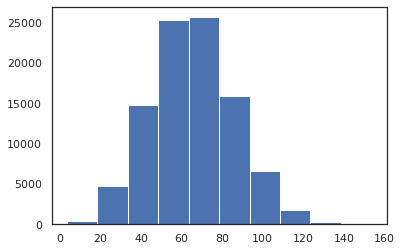

In [304]:
# (x=phi,y=length)
plt.hist(data.PHI) 

In [312]:
freq = 1  # Word freqency needs to be more than this, 
high_freq = 50  # Word freqency needs to be more than this, to be "common"
low_freq = 10  # Word freqency needs to be less than this, to be "rare"
high_phi = 100.0 # Higher than this will be consider High
low_phi  = 30.0  # Lower that this.
high_length = 6  # Longest words
low_length = 5  # Shortest words

In [313]:
# Filter frequencies
def filter_freq(value):
    """Keep (True) words more frequent that freq."""
    #return True
    if value >= freq:
        return True
    else:
        return False


frequent = data.loc[data['FRECUENC'].apply(filter_length).fillna(False)]
frequent

,PALABRA,FRECUENC,RHO,PHI,LENGTH
29,aro,6,9,34.342379,3
30,asa,6,9,35.491167,3
120,ego,6,10,20.713115,3
123,eme,6,12,22.091685,3
140,fax,6,11,16.937686,3
...,...,...,...,...,...
95138,espectacularidad,5,48,122.855822,16
95205,indisolublemente,6,54,98.183237,16
95217,innecesariamente,5,54,131.873008,16
95220,instantáneamente,6,58,115.704261,16


In [318]:
def filter_phi(value):
    """Keep all the words with higher and lower phi than the defined extremes."""
    if value > high_phi or value < low_phi:
        return True
    else:
        return False

print(len(data.PALABRA == "aba"))

data_philtered = data.loc[data['PHI'].apply(filter_phi).fillna(False)]
data_philtered

95383


,PALABRA,FRECUENC,RHO,PHI,LENGTH
2,acá,46,8,21.249512,3
3,adó,0,9,19.789907,3
4,afé,0,10,16.769372,3
5,agá,1,10,17.414417,3
6,ahé,0,10,16.636593,3
...,...,...,...,...,...
95378,ultramicroscopio,0,51,113.371630,16
95379,ventriculografía,0,52,105.930261,16
95380,vertiginosamente,2,57,112.502446,16
95381,vicealmirantazgo,0,55,120.347314,16


In [319]:
 
def filter_length(value):
    """Keep (True) all words shorter than high and longer that low. in between."""
    #return True
    if value <= high_length and value >= low_length:
        return True
    else:
        return False


chosen_words = data_philtered.loc[data_philtered['LENGTH'].apply(filter_length).fillna(False)]
chosen_words

,PALABRA,FRECUENC,RHO,PHI,LENGTH
2327,ábsit,0,17,19.747528,5
2349,achís,0,15,26.429442,5
2353,ácido,55,14,27.632133,5
2356,ácimo,0,17,26.571825,5
2368,ácueo,0,15,27.713649,5
...,...,...,...,...,...
16918,zuncho,0,22,26.054636,6
16919,zunzún,1,26,16.884143,6
16920,zuñido,0,23,26.242639,6
16933,zurrón,1,22,28.526409,6


In [322]:
len(chosen_words)

1770

In [ ]:
# TODO: use a more advanced filter to calculate constrains for the group a. 
def filter_a(value):
    """Keep (True) all words shorter than high and longer that low. in between."""
    print(value)
    print(type(value))
    #return True
    if value <= high_length and value >= low_length:
        return True
    else:
        return False
    
group_a = chosen_words.loc[chosen_words.apply(filter_a).fillna(False)]


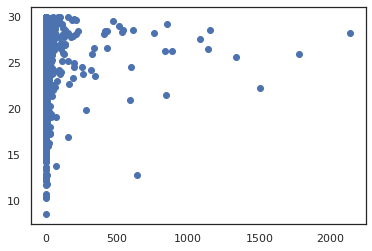

In [321]:
plt.scatter(chosen_words.FRECUENC,chosen_words.PHI)

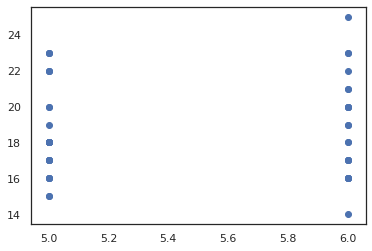

In [311]:
plt.scatter(chosen_words.FRECUENC,chosen_words.RHO)

In [ ]:
%%notify
dir(plt)

In [155]:
# Creating heatmaps in matplotlib is more difficult than it should be.
# Thankfully, Seaborn makes them easy for us.
# http://stanford.edu/~mwaskom/software/seaborn/

import seaborn as sns
sns.set(style='white')



In [ ]:
%%notify -o

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Phi vs Rho and friends')
sns.heatmap(data.T, mask=data.T.isnull(), annot=True, fmt='.0%');

